In [30]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import logging
import time
import tqdm

Data fra 1996-20

In [54]:
import requests

# Define the URL with all necessary parameters
url = "https://www.nasdaqomxnordic.com/webproxy/DataFeedProxy.aspx?SubSystem=History&Action=GetChartData&inst.an=id,nm,fnm,isin,tp,chp,ycp&FromDate=1996-08-08&ToDate=2024-08-08&json=true&timezone=CET&showAdjusted=false&app=/visitolur/soguleg_gogn-HistoryChart&DefaultDecimals=false&Instrument=DK0016268840"

# Define headers to mimic a real browser request
headers = {
    'User-Agent': 'Mozilla/5.0',
    'Referer': 'https://www.nasdaqomxnordic.com/visitolur/soguleg_gogn?languageId=5&Instrument=DK0016268840',
    'Origin': 'https://www.nasdaqomxnordic.com',
}

try:
    response = requests.get(url, headers=headers, timeout=30)
    response.raise_for_status()
    print("Request successful")
    print(response.text)
except requests.RequestException as e:
    print(f"Request failed: {e}")

# Extract the 'cp' (closing prices) data from the JSON response
data = response.json()
chart_data = data['data'][0]['chartData']['cp']

# Convert to a pandas DataFrame
df = pd.DataFrame(chart_data, columns=['Timestamp', 'Value'])

# Convert the timestamp to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Display the DataFrame
print(df)


Request successful
{
  "@status": "1",
  "@ts": "1723205291579",
  "data": [
    {
      "instData": {
        "@id": "DK0016268840",
        "@nm": "OMXC20",
        "@fnm": "OMX Copenhagen 20",
        "@isin": "DK0016268840",
        "@tp": "I",
        "@chp": "2.188686",
        "@ycp": "0.0"
      },
      "chartData": {
        "cp": [
          [
            844905600000,
            126.29
          ],
          [
            844992000000,
            127.25
          ],
          [
            845251200000,
            127.62
          ],
          [
            845337600000,
            128.82
          ],
          [
            845424000000,
            128.32
          ],
          [
            845510400000,
            128.18
          ],
          [
            845596800000,
            128.64
          ],
          [
            845856000000,
            129.26
          ],
          [
            845942400000,
            128.88
          ],
          [
            8

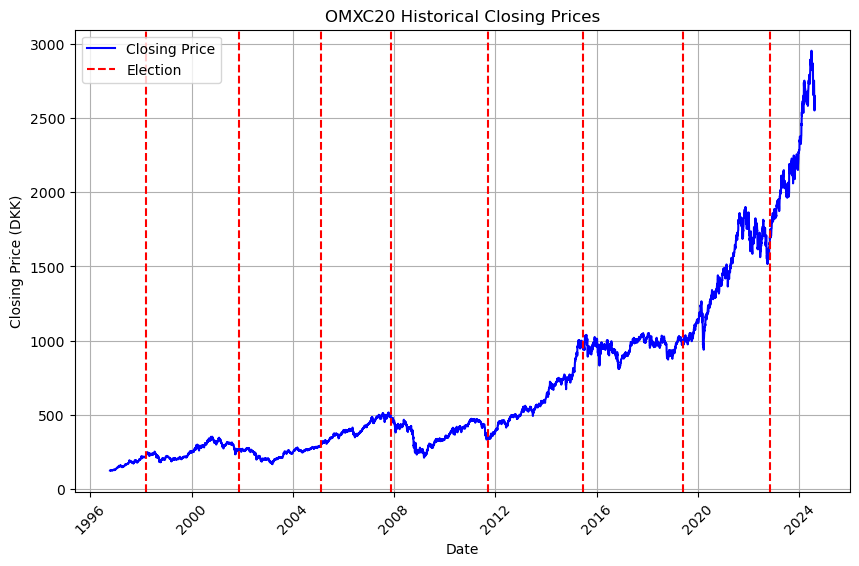

In [55]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Value'], label='Closing Price', color='blue')

# Adding vertical lines for the specified dates
election_dates = [
    '1998-03-11',
    '2001-11-20',
    '2005-02-08',
    '2007-11-13',
    '2011-09-15',
    '2015-06-18',
    '2019-06-05',
    '2022-11-01'
]

# Add the first line with the label "Election"
plt.axvline(pd.to_datetime(election_dates[0]), color='red', linestyle='--', label='Election')

# Add the remaining lines without a label
for date in election_dates[1:]:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--')

# Adding titles and labels
plt.title('OMXC20 Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (DKK)')

# Formatting the date on the x-axis for better readability
plt.xticks(rotation=45)

# Adding a grid
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


Afkast op til valg, 3, 6, 9 og 12 måneder før

In [57]:
# Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Resample the data to get the last closing price of each month
monthly_data = df['Value'].resample('M').last()

# Define election dates
election_dates = [
    '1998-03-11',
    '2001-11-20',
    '2005-02-08',
    '2007-11-13',
    '2011-09-15',
    '2015-06-18',
    '2019-06-05',
    '2022-11-01'
]

# Convert election dates to datetime objects
election_dates = pd.to_datetime(election_dates)

# Calculate returns for 3, 6, 9, and 12 months before each election date
returns = {}
for date in election_dates:
    if date in monthly_data.index:
        returns[date] = {
            '3-month': (monthly_data.loc[date] / monthly_data.loc[date - pd.DateOffset(months=3)] - 1) * 100,
            '6-month': (monthly_data.loc[date] / monthly_data.loc[date - pd.DateOffset(months=6)] - 1) * 100,
            '9-month': (monthly_data.loc[date] / monthly_data.loc[date - pd.DateOffset(months=9)] - 1) * 100,
            '12-month': (monthly_data.loc[date] / monthly_data.loc[date - pd.DateOffset(months=12)] - 1) * 100
        }

# Convert results to a DataFrame
returns_df = pd.DataFrame(returns).T

# Display the returns DataFrame
print(returns_df)


KeyError: "None of ['Timestamp'] are in the columns"